In [97]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [36]:
data = pd.read_csv("try2.csv")
print(data)

     Unique Applicant ID   Outcomes: Default = 1   Age   Years at Employer  \
0                       1                      0 -0.26                0.11   
1                       2                      1 -0.01                0.50   
2                       3                      1  0.37                0.57   
3                       4                      0 -0.73               -1.07   
4                       5                      0 -0.25               -0.17   
5                       6                      1  0.57               -0.60   
6                       7                      0  1.48                1.22   
7                       8                      0  0.89                1.08   
8                       9                      0  1.48                0.49   
9                      10                      0 -0.90                0.13   
10                     11                      1  0.07               -1.12   
11                     12                      0 -1.06          

In [37]:
data=data.dropna()
print(data.shape)
print(list(data.columns))

(400, 8)
['Unique Applicant ID ', 'Outcomes: Default = 1', ' Age', ' Years at Employer', 'Years at Address', 'Income', 'Credit Card Debt ', 'Automobile Debt']


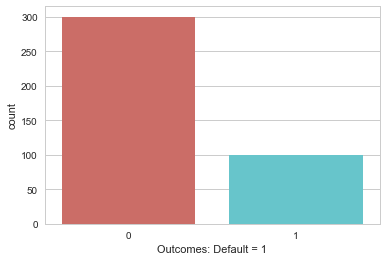

In [38]:
sns.countplot(x='Outcomes: Default = 1',data=data, palette='hls')

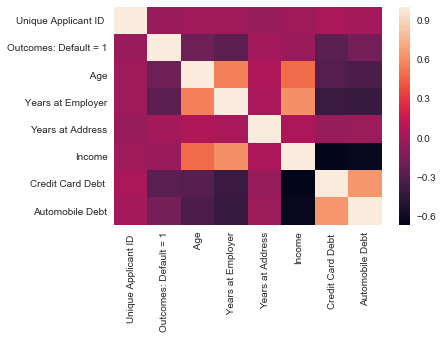

In [39]:
sns.heatmap(data.corr())
plt.show()

In [40]:
data.drop(data.columns[[0]],axis=1,inplace = True)
data.head()

,Outcomes: Default = 1,Age,Years at Employer,Years at Address,Income,Credit Card Debt,Automobile Debt
0,0,-0.26,0.11,-0.78,-0.22,-0.01,0.21
1,1,-0.01,0.50,1.14,0.36,-3.18,-1.51
2,1,0.37,0.57,-1.12,0.26,-2.11,-0.21
3,0,-0.73,-1.07,1.71,-0.60,0.51,0.53
4,0,-0.25,-0.17,-0.88,-0.49,0.53,0.80


In [41]:
data.columns

Index(['Outcomes: Default = 1', ' Age', ' Years at Employer',
       'Years at Address', 'Income', 'Credit Card Debt ', 'Automobile Debt'],
      dtype='object')

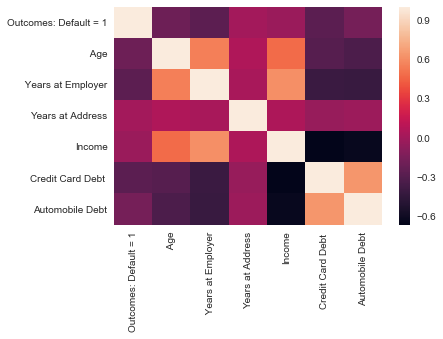

In [42]:
sns.heatmap(data.corr())
plt.show()

In [88]:
X=data.iloc[0:,1:]
y=data.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [89]:
print(X_train)

      Age   Years at Employer  Years at Address  Income  Credit Card Debt   \
250 -1.81               -1.07             -0.24   -0.85               0.67   
63  -0.51               -1.22              0.45   -0.69               0.41   
312  0.63               -0.24             -0.52    0.39              -1.22   
159 -0.17               -0.15             -1.08   -0.51               0.48   
283 -0.38                0.83              0.60   -0.52               0.61   
340 -1.37               -0.39             -1.26   -0.74               0.34   
81  -0.47               -1.17             -0.95   -0.49               0.34   
349 -1.90               -1.21             -0.21   -0.54              -0.04   
153 -0.39               -0.97             -0.09   -0.53              -0.23   
295  0.23                0.88             -0.20   -0.18              -0.65   
96  -1.30               -0.60             -0.45   -0.77               0.77   
89   1.42               -0.10             -0.37   -0.24         

In [100]:
classifier = LogisticRegression(random_state=0)

In [101]:
y_pred_undersample_score=classifier.fit(X_train,y_train)


In [105]:
y_pred = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_undersample_score)

TypeError: Expected sequence or array-like, got estimator LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)